In [21]:
import pandas as pd
import seaborn as sns
import matplotlib as pls
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv(r'datasets/3_taxi_peru.csv', sep=';', parse_dates=['start_at','end_at','arrived_at'])

In [10]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [55]:
df_end = (df.groupby('source', as_index=False).end_state.count().sort_values(by='end_state',ascending=False)).reset_index()

In [56]:
df_end

,index,source,end_state
0,3,iPhone,9734
1,4,web,7631
2,0,Android,4904
3,2,iPad,571
4,1,Wap,136


In [34]:
# df.groupby('source').journey_id.count().sort_values('journey_id', ascending=False)
df_val = (df.groupby('source').journey_id.count() / df.journey_id.count()*100).sort_values(ascending=False).reset_index()

In [35]:
np.round(df_val)

,source,journey_id
0,iPhone,42.0
1,web,33.0
2,Android,21.0
3,iPad,2.0
4,Wap,1.0


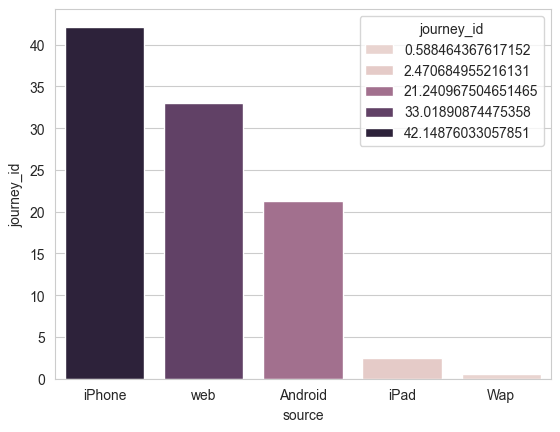

In [40]:
ax = sns.barplot(x='source',y= 'journey_id',data = df_val, hue='journey_id')

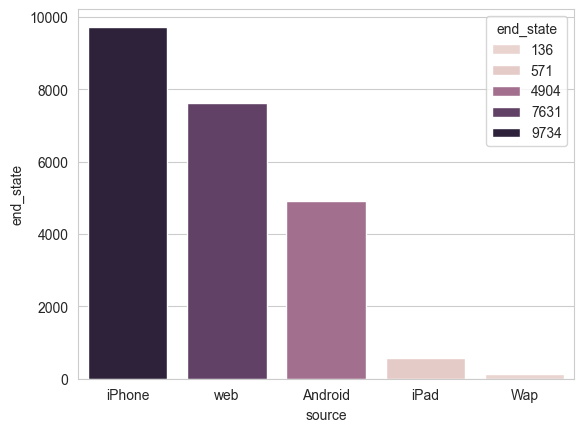

In [61]:
ax = sns.barplot(data=df_end, y ='end_state', x = 'source', hue='end_state')

In [71]:
df_raiting = (np.round(df[['driver_score']].value_counts(normalize=True).mul(100))).reset_index()

In [77]:
df_raiting = df_raiting.rename(columns={'proportion': 'percentage'})

In [78]:
df_raiting

,driver_score,percentage
0,5.0,59.0
1,4.0,22.0
2,0.0,14.0
3,3.0,3.0
4,1.0,1.0
5,2.0,1.0


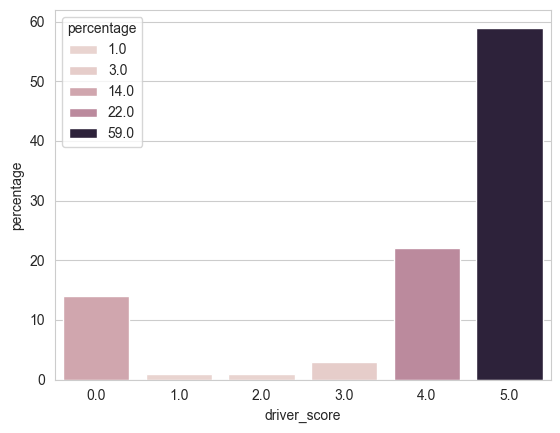

In [79]:
ax = sns.barplot(data=df_raiting, x= 'driver_score', y ='percentage', hue='percentage')